In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap
import seaborn as sns
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
from datetime import datetime
import os, sys
import re



In [203]:

G = nx.fast_gnp_random_graph(11, 0.4, seed = 42)

for e in G.edges():
    if np.random.uniform() <0.1:
        w = np.random.uniform(low = 0.1, high = 0.3)
        G.edges[e[0], e[1]]['weight'] = -w
    else:
        w = np.random.uniform(low = 0.1, high = 0.3)
        G.edges[e[0], e[1]]['weight'] = w




In [204]:
A = nx.adjacency_matrix(G).todense()
np.fill_diagonal(A, np.sum(np.abs(A), axis = 1))

C:\Users\User\AppData\Local\Temp\ipykernel_19356\3771421983.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


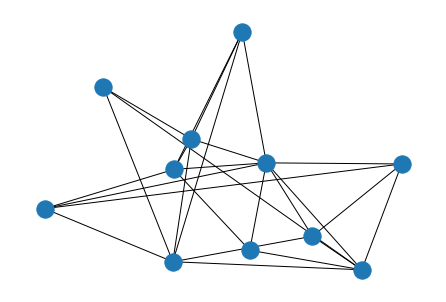

In [205]:
nx.draw(G)

In [206]:
A[10,8]

0.10939291125904933

In [207]:
A[5,:]

matrix([[ 0.21911442,  0.        ,  0.        ,  0.        ,  0.        ,
          0.67981095, -0.25367973,  0.        ,  0.        ,  0.2070168 ,
          0.        ]])

In [223]:
sys.path.insert(0, 'C:/Users/User/Code/MMD_Graph_Diversification')
sys.path.insert(0, 'C:/Users/User/Code/MMD_Graph_Diversification/myKernels')
from myKernels import RandomWalk  as rw

import MMDforGraphs as mg

from sklearn.covariance import graphical_lasso, GraphicalLasso



for _ in range(10):
    alpha = 0.05
    Gs1 = []
    Gs2 = []
    error1 = []
    error2 = []
    for i in range(50):
        x1 = np.random.multivariate_normal(mean = np.zeros(11), cov = np.linalg.inv(A), size = 100)
        A1 = np.corrcoef(x1.T)
        gl = GraphicalLasso(alpha = alpha, max_iter = 1000).fit(x1)
        A1 = gl.precision_
        Gs1.append(nx.from_numpy_matrix(A1))
        error1.append(np.sum(np.abs(A1 - A)))

        A_s = A.copy()
        A_s[6,4] = 0
        A_s[4,6] = 0
        A_s[5,0] = 0
        A_s[0,5] = 0
        x2 = np.random.multivariate_normal(mean = np.zeros(11), cov = np.linalg.inv(A_s), size = 100)
        A2 = np.corrcoef(x2.T)
        gl = GraphicalLasso(alpha = alpha, max_iter = 1000).fit(x2)
        A2 = gl.precision_
        Gs2.append(nx.from_numpy_matrix(A2))

        error2.append(np.sum(np.abs(A2 - A_s)))


        

    Gs = Gs1 + Gs2


    rw_kernel = rw.RandomWalk(Gs, c = 1e-3, normalize=0)
    K = rw_kernel.fit_ARKU_plus(r=6, verbose = False, edge_attr='weight')
    v,_ = np.linalg.eigh(K)
    # v[np.abs(v) < 10e-5] = 0
    if np.any(v < -10e-8):
        raise ValueError("Not psd WEIGHT")

    print(np.mean(error1))
    print(np.mean(error2))

    MMD_functions = [mg.MMD_u]

    kernel_hypothesis = mg.BoostrapMethods(MMD_functions)
    function_arguments=[dict(n = 50, m = 50 )]
    kernel_hypothesis.Bootstrap(K, function_arguments, B = 5000)
    print(kernel_hypothesis.p_values)


C:/Users/User/Code/MMD_Graph_Diversification\myKernels\RandomWalk.py:906: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


7.432721422202792
7.217535637361858
{'MMD_u': 0.0008}


C:/Users/User/Code/MMD_Graph_Diversification\myKernels\RandomWalk.py:906: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


7.327577735349763
7.255693223530838
{'MMD_u': 0.0076}


C:/Users/User/Code/MMD_Graph_Diversification\myKernels\RandomWalk.py:906: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


7.343652570590734
7.293836704034154
{'MMD_u': 0.347}


C:/Users/User/Code/MMD_Graph_Diversification\myKernels\RandomWalk.py:906: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


7.292046203454596
7.416627738739098
{'MMD_u': 0.0278}


C:/Users/User/Code/MMD_Graph_Diversification\myKernels\RandomWalk.py:906: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


7.467980391993985
7.20103240510972
{'MMD_u': 0.0012}


C:/Users/User/Code/MMD_Graph_Diversification\myKernels\RandomWalk.py:906: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


7.03397831664773
7.4136402675466915
{'MMD_u': 0.0028}


C:/Users/User/Code/MMD_Graph_Diversification\myKernels\RandomWalk.py:906: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


7.382395141678448
7.407697197203429
{'MMD_u': 0.0038}


C:/Users/User/Code/MMD_Graph_Diversification\myKernels\RandomWalk.py:906: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


7.511299221879208
7.295796559630833
{'MMD_u': 0.0166}


C:/Users/User/Code/MMD_Graph_Diversification\myKernels\RandomWalk.py:906: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


7.468004771244137
7.552855880312711
{'MMD_u': 0.097}


C:/Users/User/Code/MMD_Graph_Diversification\myKernels\RandomWalk.py:906: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


7.4686557713459525
7.340280094959227
{'MMD_u': 0.7062}


In [2]:

def readfoldertopanda(path):
    """
    Read files in a folder and concatenate them into an pandas data frame
    """
    onlyfiles = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    # read and append
    df = []
    for file in onlyfiles:
        df.append(pd.read_pickle(os.path.join(path, file)))

    return pd.concat(df)

In [12]:
data = readfoldertopanda('../data/GLasso3/')
data.columns

Index(['p_val', 'sample', 'mean_error_1', 'mean_error_2', 'mean_mse_error_1',
       'mean_mse_error_2', 'alpha', 'kernel', 'H0'],
      dtype='object')

In [4]:
def plot_glasso(data, title = None, legend = False):
    alphas = np.unique(data['alpha'])
    rejection_rate1 = []
    rejection_rate5 = []
    rejection_rate10 = []
    mean_error_1 = []
    mean_error_2 = []
    for alpha in alphas:
        N = len(data['p_val'].loc[data['alpha'] == alpha])
        rejection_rate1.append(np.sum(data['p_val'].loc[data['alpha'] == alpha] <0.01)/N)
        rejection_rate5.append(np.sum(data['p_val'].loc[data['alpha'] == alpha] <0.05)/N)
        rejection_rate10.append(np.sum(data['p_val'].loc[data['alpha'] == alpha] <0.1)/N)
        mean_error_1.append(np.mean(data['mean_error_1'].loc[data['alpha'] == alpha]))
        mean_error_2.append(np.mean(data['mean_error_2'].loc[data['alpha'] == alpha]))



    sec_ax_const = 0.03

    fig, ax = plt.subplots(1,1, figsize=(15,10))

    ax.axhline(y=0.05, color = 'black', alpha = 0.5, linestyle = 'dashed')

    ax.plot(alphas,rejection_rate1, label = r'Prop. rejected at $\alpha = 0.01$')
    ax.plot(alphas,rejection_rate5, label = r'Prop. rejected at $\alpha = 0.05$')
    ax.plot(alphas,rejection_rate10, label = r'Prop. rejected at $\alpha = 0.1$')
    ax.plot(alphas,np.array(mean_error_1)*sec_ax_const, label = 'Mean error of sample 1')
    ax.plot(alphas,np.array(mean_error_2)*sec_ax_const, label = 'Mean error of sample 1')
    ax.set_ylabel("Proportion rejected")
    ax.set_ylim([0, 1.05])
    ax.set_xlabel("Regularization")
    if legend:
        ax.legend(bbox_to_anchor=[1.1, 1])

    def fun1(x):
        return x/sec_ax_const

    def fun2(x):
        return x*sec_ax_const


    secax_y = ax.secondary_yaxis(
        'right', functions=(fun1, fun2))
    secax_y.set_ylabel('Error')

    ax.set_title(title)

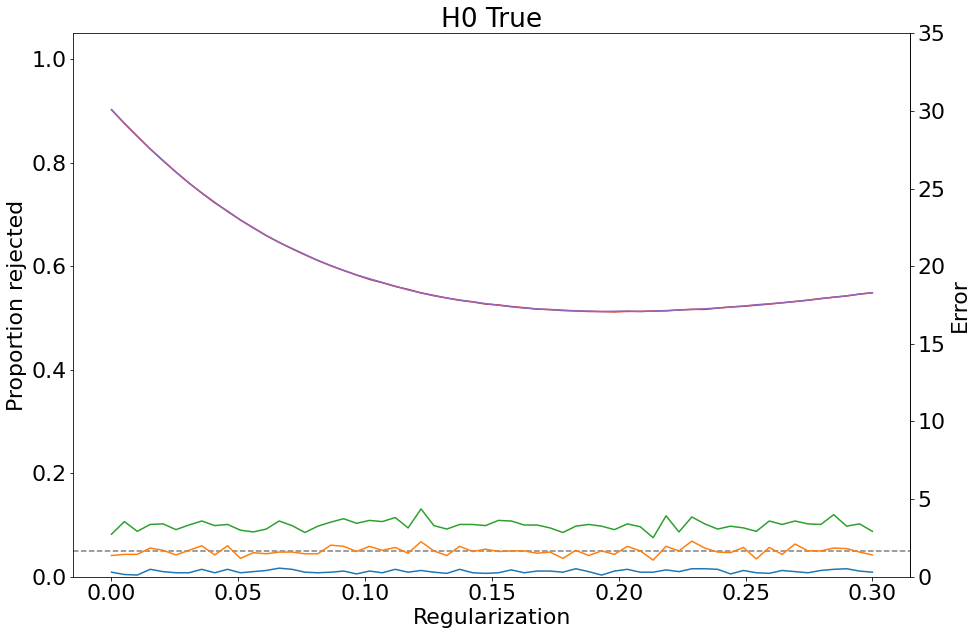

In [13]:
matplotlib.rcParams.update({'font.size': 22})
h0_true = data.loc[data['H0'] ]
plot_glasso(h0_true, "H0 True")

In [246]:
np.sum(h0_false['p_val'] <= 0.05)/h0_false.shape[0]

0.41555555555555557

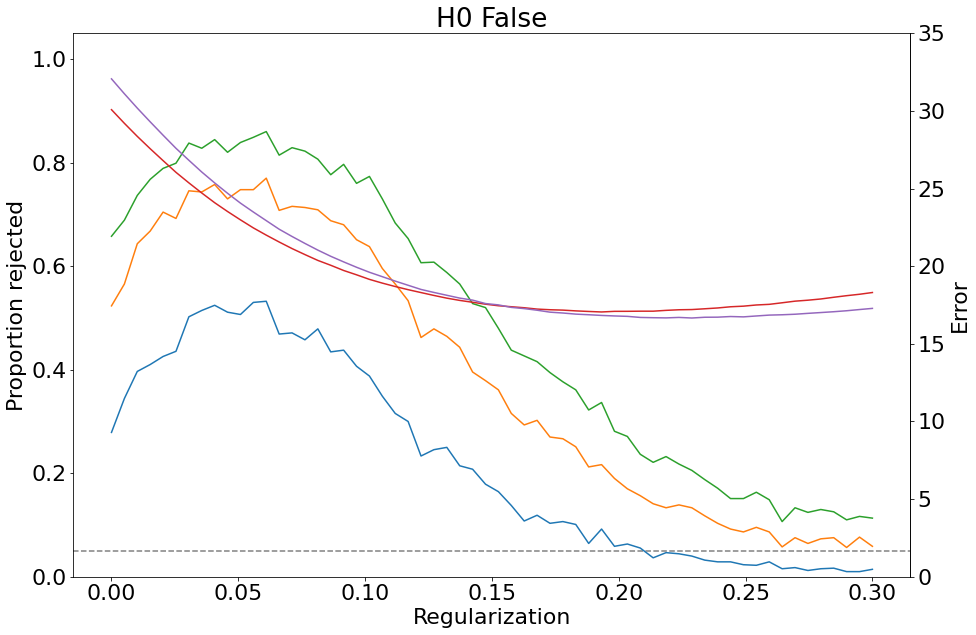

In [10]:
h0_false = data.loc[~data['H0'] ]
plot_glasso(h0_false, "H0 False")

In [238]:
np.unique(data['alpha'])[0]

0.0

In [240]:
data.loc[(~data['H0']) & (data['alpha'] == np.unique(data['alpha'])[1]) ]

,p_val,sample,mean_error_1,mean_error_2,mean_mse_error_1,mean_mse_error_2,alpha,kernel,H0
0,0.0446,149,29.72,31.26,11.189147,11.633079,0.004082,rw,False
0,0.1992,149,29.28,31.12,11.249347,11.226258,0.004082,rw,False
0,0.7858,149,29.68,31.30,11.472395,11.174035,0.004082,rw,False
0,0.2592,149,29.38,31.26,10.829020,11.236097,0.004082,rw,False
0,0.3328,149,29.30,31.22,11.391953,11.462826,0.004082,rw,False
0,0.8156,149,29.38,31.52,11.224023,11.690299,0.004082,rw,False
